# RSML architecture

Read architecture from RSML file and run a simulation to illustrate how to use the RSML format (http://rootsystemml.github.io/). The architecture is the arabidopsis-simple example from http://rootsystemml.github.io/images/examples/arabidopsis-simple.rsml.

Point to the source files if the notebook is run locally, from a git repository clone for example, without openalea.hydroroot installation, but only the dependencies installed.

In [1]:
import openalea.rsml as rsml
from openalea.hydroroot import radius
from openalea.hydroroot.main import hydroroot_flow
from openalea.widgets.plantgl import PlantGL # notebook viewer 3D
from openalea.plantgl.algo.view import view # 2D view
from openalea.hydroroot.display import mtg_scene
from openalea.hydroroot.hydro_io import import_rsml_to_discrete_mtg, export_mtg_to_rsml

/home/bauget/Documents/Dev/hydroroot/src/openalea/hydroroot/main.py:99: SyntaxWarning: invalid escape sequence '\ '
  :param k0: (float) - not used radial conductivity in :math:`10^{-9}\ m.s^{-1}.MPa^{-1}` (Default value = 300) #TODO not used delete it
/home/bauget/Documents/Dev/hydroroot/src/openalea/hydroroot/conductance.py:159: SyntaxWarning: invalid escape sequence '\ '
  """Compute the radial conductance k (:math:`10^{-9}\ m.s^{-1}.MPa^{-1}`) of each vertex of the MTG.


## Read RSML

Read the RSML file and convert it into a *continuous* MTG. This is a MTG where each root (primary and lateral) is represented by one vertex. The geometry of each root is then stored in g_c.property('geometry').

In [2]:
g_c = rsml.rsml2mtg('data/arabidopsis-simple.rsml')

To be used in HydroRoot the MTG has to be converted to a *discrete* form of MTG, i.e. each vertex represent a representative elementary volume of a given length for example $10^{-4}$ m. In HydroRoot the lengths are in meter, therefore we must retrieve the resolution and the unit of the RSML file. 

In [3]:
resolution = g_c.graph_properties()['metadata']['resolution'] # pixel to unit
unit = g_c.graph_properties()['metadata']['unit']
print(unit)

cm


In [4]:
resolution = resolution * 0.01 # pixel to unit to m

## Build the discrete MTG

In [5]:
g = import_rsml_to_discrete_mtg(g_c, segment_length = 1.0e-4, resolution = resolution)

## Run calculation

Calculate some properties needed to simulate a sap flux from the root under overpressure. 

In [6]:
g = radius.ordered_radius(g, 7.0e-5, 0.7) # root radii
g = radius.compute_relative_position(g) # Compute the position of each segment relative to the axis bearing it

Some conductance data versus distance to tip

In [7]:
k_radial_data=([0, 0.2],[30.0,30.0])
K_axial_data=([0, 0.2],[3.0e-7,4.0e-4])

Flux and equivalent conductance calculation, for a root in an external hydroponic medium at 0.4 MPa, its base at 0.1 MPa, and with the conductances set above.

In [8]:
g, keq, jv = hydroroot_flow(g, psi_e = 0.4, psi_base = 0.1, axial_conductivity_data = K_axial_data, radial_conductivity_data = k_radial_data)

In [9]:
print('equivalent root conductance (microL/s/MPa): ',keq, 'sap flux (microL/s): ', jv)

equivalent root conductance (microL/s/MPa):  0.0014303117762878164 sap flux (microL/s):  0.000429093532886345


## Display the local water uptake heatmap

to reduce notebook size we use here a 2D view but you can use the openalea.widgets `PlantGL(s)` to display an interactive 3D view

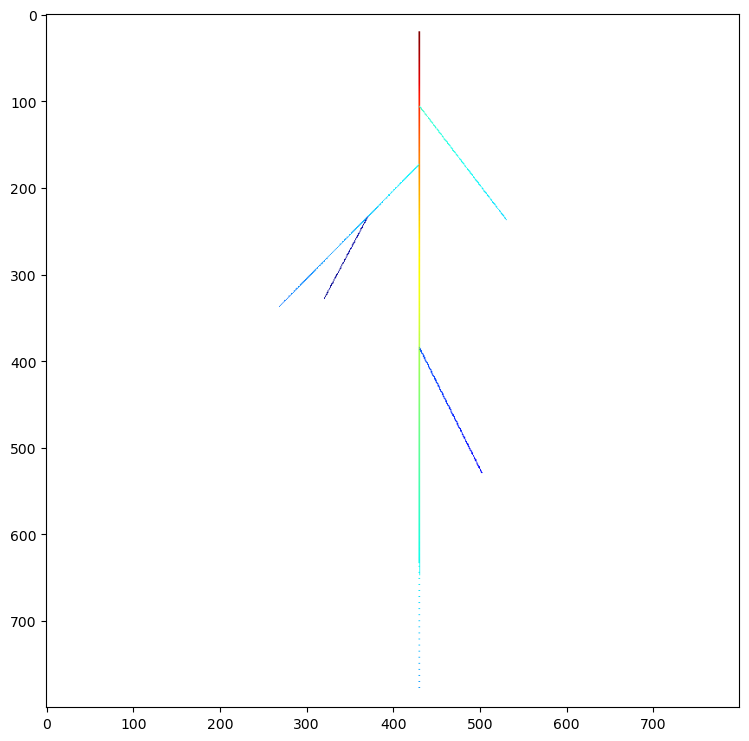

In [10]:
s = mtg_scene(g, prop_cmap = 'j') # create a scene from the mtg with the property j is the radial flux in ul/s
view(s) # use PlantGL(s) to display in 3D

## Export the MTG to RSML

At this stage (2022-08-22) only the root length and the branching position are used to simulate architecture in hydroponic solution. The exact position in 3D is not stored in the discrete MTG form and so not exported to RMSL.

In [11]:
export_mtg_to_rsml(g, "test.rsml", segment_length = 1.0e-4)

The resolution of the RSML data is 1.0e-4 and the unit is meter.